# Business Problem

### As a real estate agency, our goal is to provide our clients estimates on the sale price of the house based on current market conditions. Also, to provide recommendations on improvements that can increase the selling price.

### For this project, the goal is to identify to identify minimum 2 coeffecients (factors) that will aid in increasing the value of a house

In [1]:
#importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


### Using the `date` info to categorize seasons to check for possible seasonal differences in the sale prices.

In [3]:
#getting the month data first 
df['date'] = df['date'].astype('datetime64[ns]')
df['month_of_sale'] = df['date'].dt.month 

In [4]:
# creating a dict to convert the numeric value into month 
months  = {1 : 'January',
           2 : 'February',
           3 : 'March',
           4 : 'April',
           5 : 'May',
           6 : 'June',
           7 : 'July',
           8 : 'August',
           9 : 'September',
           10 : 'October',
           11 : 'November',
           12 : 'December'}

#applying it to the df
df['month_of_sale'] = df['month_of_sale'].map(months)

In [5]:
# defining seasons and adding to the df
seasons = {'March' : 'Spring',
          'April' : 'Spring',
          'May' : 'Spring',
          'June' : 'Summer',
          'July' : 'Summer',
          'August' : 'Summer',
          'September' : 'Autumn',
          'October' : 'Autumn',
          'November' : 'Autumn',
          'December' : 'Winter',
          'January' : 'Winter',
          'February' : 'Winter'}

#applying it to the df
df['season'] = df['month_of_sale'].map(seasons)

In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_of_sale,season
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,October,Autumn
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,December,Winter
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,February,Winter
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,December,Winter
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,February,Winter


In [7]:
#creating a copy of the df for the analysis
df1 = df.copy()

In [8]:
# removing the id column since it is not relevant for the analysis
df1.drop('id',axis=1,inplace=True)

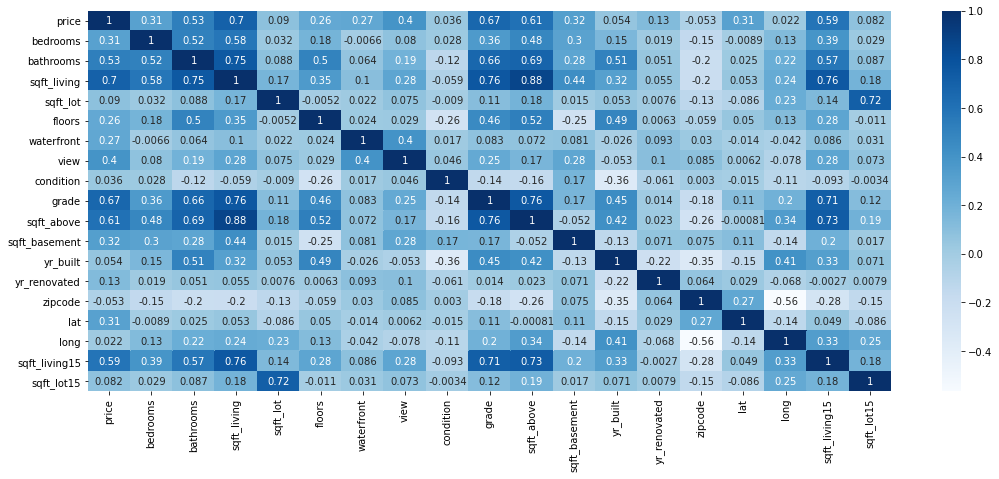

In [9]:
# looking at a heatmap to see which variables are most correlated with price
import seaborn as sns

fig,ax = plt.subplots(figsize=(18,7))
corr = df1.corr()
sns.heatmap(corr,cmap='Blues',ax=ax,annot=True);

### Since, `season` is of `object` data type, it needs to be converted into an integer to show up in the heat map. For this, we will employ `OneHotEncoder`.

In [10]:
# importing the relevant library
from sklearn.preprocessing import OneHotEncoder
seasons = df1[['season']]

#instantiate
encoder_seasons = OneHotEncoder(categories='auto',sparse=False,handle_unknown='ignore')

#fit it to the data
encoder_seasons.fit(seasons)

#inspecting the categories
encoder_seasons.categories_


[array(['Autumn', 'Spring', 'Summer', 'Winter'], dtype=object)]

In [11]:
#transforming the data
seasons_encoded = encoder_seasons.transform(seasons)
seasons_encoded

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]])

In [12]:
#converting the encoded values into a df
seasons_encoded_df = pd.DataFrame(data=seasons_encoded,index=df1.index)
seasons_encoded_df.head()

,0,1,2,3
0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0


In [13]:
#renaming the columns to readability
seasons_encoded_df.rename(columns = {0:'Autumn',1:'Spring',2:'Summer',3:'Winter'},inplace=True)

In [14]:
# adding the encoded values to df1
df1 = pd.concat([df1,seasons_encoded_df],axis=1)
df1.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,lat,long,sqft_living15,sqft_lot15,month_of_sale,season,Autumn,Spring,Summer,Winter
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,47.5112,-122.257,1340,5650,October,Autumn,1.0,0.0,0.0,0.0
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,47.7210,-122.319,1690,7639,December,Winter,0.0,0.0,0.0,1.0
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,47.7379,-122.233,2720,8062,February,Winter,0.0,0.0,0.0,1.0
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,47.5208,-122.393,1360,5000,December,Winter,0.0,0.0,0.0,1.0
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,47.6168,-122.045,1800,7503,February,Winter,0.0,0.0,0.0,1.0


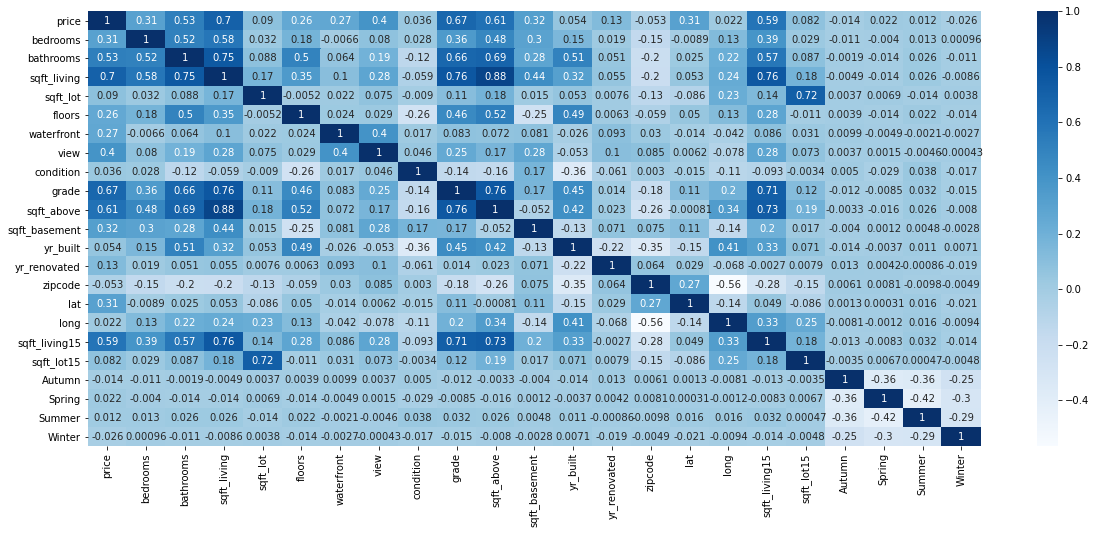

In [15]:
# looking at the updated heatmap
fig,ax = plt.subplots(figsize=(20,8))
corr = df1.corr()
sns.heatmap(corr,cmap='Blues',annot=True);

# Building the model with `statsmodel` - baseline

In [71]:
#import the library
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [17]:
#building the baseline model
outcome = 'price'
variables = df1.drop(cats_to_drop,axis=1)
variables_sum = '+'.join(variables.columns)

f = outcome + '~' + variables_sum
model_baseline = ols(formula=f,data=df1).fit()

model_baseline.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     2530.
Date:                Sat, 15 Oct 2022   Prob (F-statistic):               0.00
Time:                        09:31:27   Log-Likelihood:            -2.9453e+05
No. Observations:               21611   AIC:                         5.891e+05
Df Residuals:                   21590   BIC:                         5.893e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.452e+06   2.34e+06      2.329      0.020    8.63e+05       1e+07
bedrooms      -3.597e+04   1888.758    -19.044      0.000   -3.97e+04   -3.23e+04
bathrooms      4.128e+04   3247.887     12.709      0.000    3.49e+04    4.76e+04
sqft_living     110.6702      2.266     48.836      0.000     106.228     115.112
sqft_lot          0.1271      0.048      2.656      0.008       0.033       0.221
floors         6995.2821   3589.813      1.949      0.051     -41.016     1.4e+04
waterfront     5.838e+05   1.73e+04     33.694      0.000     5.5e+05    6.18e+05
view           5.275e+04   2136.291     24.690      0.000    4.86e+04    5.69e+04
condition      2.706e+04   2350.216     11.514      0.000    2.25e+04    3.17e+04
grade          9.574e+04   2149.047     44.548      0.000    9.15e+04    9.99e+04
sqft_above       71.0450      2.250     31.582      0.000      66.636      75.454
sqft_basement    39.6260      2.642     14.997      0.000      34.447      44.805
yr_built      -2619.8107     72.531    -36.120      0.000   -2761.978   -2477.644
yr_renovated     19.7557      3.649      5.414      0.000      12.603      26.909
zipcode        -584.4168     32.928    -17.749      0.000    -648.957    -519.876
lat            6.029e+05   1.07e+04     56.264      0.000    5.82e+05    6.24e+05
long          -2.152e+05   1.31e+04    -16.414      0.000   -2.41e+05    -1.9e+05
sqft_living15    21.6151      3.442      6.280      0.000      14.869      28.361
sqft_lot15       -0.3857      0.073     -5.274      0.000      -0.529      -0.242
Autumn         1.355e+06   5.85e+05      2.315      0.021    2.08e+05     2.5e+06
Spring         1.384e+06   5.85e+05      2.364      0.018    2.36e+05    2.53e+06
Summer         1.357e+06   5.85e+05      2.318      0.020    2.09e+05     2.5e+06
Winter         1.357e+06   5.85e+05      2.319      0.020     2.1e+05     2.5e+06
==============================================================================
Omnibus:                    18426.545   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1898428.654
Skew:                           3.576   Prob(JB):                         0.00
Kurtosis:                      48.356   Cond. No.                     1.60e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.59e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [18]:
print('R-squared value for baseline model = ',model_baseline.rsquared)

R-squared value for baseline model =  0.700945186471388


In [19]:
#looking at the summary statistics for each variable
df1.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Autumn,Spring,Summer,Winter
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,...,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,0.234257,0.301670,0.292926,0.171147
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,...,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.423543,0.458994,0.455115,0.376646
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,0.000000,0.000000,0.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,0.000000,0.000000,0.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,0.000000,1.000000,1.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000,1.000000,1.000000,1.000000


#### From the above, we can see that the `standard deviaton` for `[sqft living,sqft_lot,sqft_living15,sqft_lot15,yr_renovated]` are quite high

In [20]:
# examining yr_renovated
df1['yr_renovated'].value_counts()

0       20699
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

### Looks like `yr_renovated` has 20699 rows of 0 values, indicating that nearly 96% of the houses in the dataset have not been renovated. Hence, we can factor it out from our analysis - model_1

In [21]:
#update the categories to drop
cats_to_drop = ['price','date','month_of_sale','season','yr_renovated']
outcome = 'price'
variables = df1.drop(cats_to_drop,axis=1)
variables_sum = '+'.join(variables.columns)

f = outcome + '~' + variables_sum
model_1 = ols(formula=f,data=df1).fit()

model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2658.
Date:                Sat, 15 Oct 2022   Prob (F-statistic):               0.00
Time:                        09:31:28   Log-Likelihood:            -2.9455e+05
No. Observations:               21611   AIC:                         5.891e+05
Df Residuals:                   21591   BIC:                         5.893e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.373e+06   2.34e+06      2.728      0.006    1.79e+06     1.1e+07
bedrooms       -3.63e+04   1888.978    -19.219      0.000      -4e+04   -3.26e+04
bathrooms       4.36e+04   3221.547     13.534      0.000    3.73e+04    4.99e+04
sqft_living     110.7460      2.268     48.839      0.000     106.301     115.191
sqft_lot          0.1236      0.048      2.581      0.010       0.030       0.217
floors         8019.7063   3587.171      2.236      0.025     988.587    1.51e+04
waterfront     5.891e+05   1.73e+04     34.024      0.000    5.55e+05    6.23e+05
view           5.311e+04   2136.636     24.856      0.000    4.89e+04    5.73e+04
condition      2.487e+04   2316.476     10.734      0.000    2.03e+04    2.94e+04
grade          9.615e+04   2149.069     44.742      0.000    9.19e+04       1e+05
sqft_above       70.9808      2.251     31.534      0.000      66.569      75.393
sqft_basement    39.7721      2.644     15.042      0.000      34.590      44.955
yr_built      -2745.0786     68.786    -39.907      0.000   -2879.905   -2610.252
zipcode        -589.1986     32.937    -17.889      0.000    -653.758    -524.639
lat            6.006e+05   1.07e+04     56.057      0.000     5.8e+05    6.22e+05
long          -2.126e+05   1.31e+04    -16.213      0.000   -2.38e+05   -1.87e+05
sqft_living15    20.6139      3.439      5.994      0.000      13.873      27.355
sqft_lot15       -0.3802      0.073     -5.195      0.000      -0.524      -0.237
Autumn         1.585e+06   5.84e+05      2.714      0.007     4.4e+05    2.73e+06
Spring         1.614e+06   5.84e+05      2.763      0.006    4.69e+05    2.76e+06
Summer         1.587e+06   5.84e+05      2.717      0.007    4.42e+05    2.73e+06
Winter         1.587e+06   5.84e+05      2.717      0.007    4.42e+05    2.73e+06
==============================================================================
Omnibus:                    18425.612   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1895534.602
Skew:                           3.576   Prob(JB):                         0.00
Kurtosis:                      48.320   Cond. No.                     1.66e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.99e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [22]:
print('R-squared value for the baseline model = ',model_baseline.rsquared)
print('R-squared value for model_1 = ',model_1.rsquared)

R-squared value for the baseline model =  0.700945186471388
R-squared value for model_1 =  0.7005392456518655


### removing `sqft_lot15` - model_2

In [23]:
#removing sqft_lot15
cats_to_drop = ['price','date','month_of_sale','season','yr_renovated','sqft_lot15']
outcome = 'price'
variables = df1.drop(cats_to_drop,axis=1)
variables_sum = '+'.join(variables.columns)

f = outcome + '~' + variables_sum
model_2 = ols(formula=f,data=df1).fit()

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2801.
Date:                Sat, 15 Oct 2022   Prob (F-statistic):               0.00
Time:                        09:31:28   Log-Likelihood:            -2.9456e+05
No. Observations:               21611   AIC:                         5.892e+05
Df Residuals:                   21592   BIC:                         5.893e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.885e+06   2.34e+06      2.519      0.012    1.31e+06    1.05e+07
bedrooms      -3.585e+04   1888.115    -18.989      0.000   -3.96e+04   -3.22e+04
bathrooms      4.402e+04   3222.469     13.661      0.000    3.77e+04    5.03e+04
sqft_living     110.1834      2.266     48.617      0.000     105.741     114.626
sqft_lot         -0.0477      0.035     -1.374      0.170      -0.116       0.020
floors         8662.3886   3587.194      2.415      0.016    1631.224    1.57e+04
waterfront     5.879e+05   1.73e+04     33.942      0.000    5.54e+05    6.22e+05
view           5.305e+04   2137.896     24.816      0.000    4.89e+04    5.72e+04
condition      2.469e+04   2317.621     10.653      0.000    2.01e+04    2.92e+04
grade          9.645e+04   2149.615     44.868      0.000    9.22e+04    1.01e+05
sqft_above       70.5072      2.251     31.329      0.000      66.096      74.918
sqft_basement    39.6748      2.645     14.998      0.000      34.490      44.860
yr_built      -2748.9729     68.824    -39.942      0.000   -2883.872   -2614.074
zipcode        -590.5157     32.956    -17.918      0.000    -655.112    -525.919
lat            6.019e+05   1.07e+04     56.163      0.000    5.81e+05    6.23e+05
long          -2.181e+05   1.31e+04    -16.684      0.000   -2.44e+05   -1.93e+05
sqft_living15    19.7414      3.437      5.744      0.000      13.004      26.478
Autumn         1.463e+06   5.84e+05      2.506      0.012    3.19e+05    2.61e+06
Spring         1.492e+06   5.84e+05      2.555      0.011    3.47e+05    2.64e+06
Summer         1.465e+06   5.84e+05      2.508      0.012     3.2e+05    2.61e+06
Winter         1.465e+06   5.84e+05      2.509      0.012     3.2e+05    2.61e+06
==============================================================================
Omnibus:                    18429.713   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1898911.833
Skew:                           3.577   Prob(JB):                         0.00
Kurtosis:                      48.361   Cond. No.                     1.58e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.6e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [24]:
print('R-squared value for the baseline model = ',model_baseline.rsquared)
print('R-squared value for model_1 = ',model_1.rsquared)
print('R-squared value for model_2 = ',model_2.rsquared)

R-squared value for the baseline model =  0.700945186471388
R-squared value for model_1 =  0.7005392456518655
R-squared value for model_2 =  0.7001649223954842


### Let's look at the predictor variables and get an idea of how they are distributed. For linear regression, while normality of the predictors is not an assumption, but it does help the model if the predictors are normally distributed

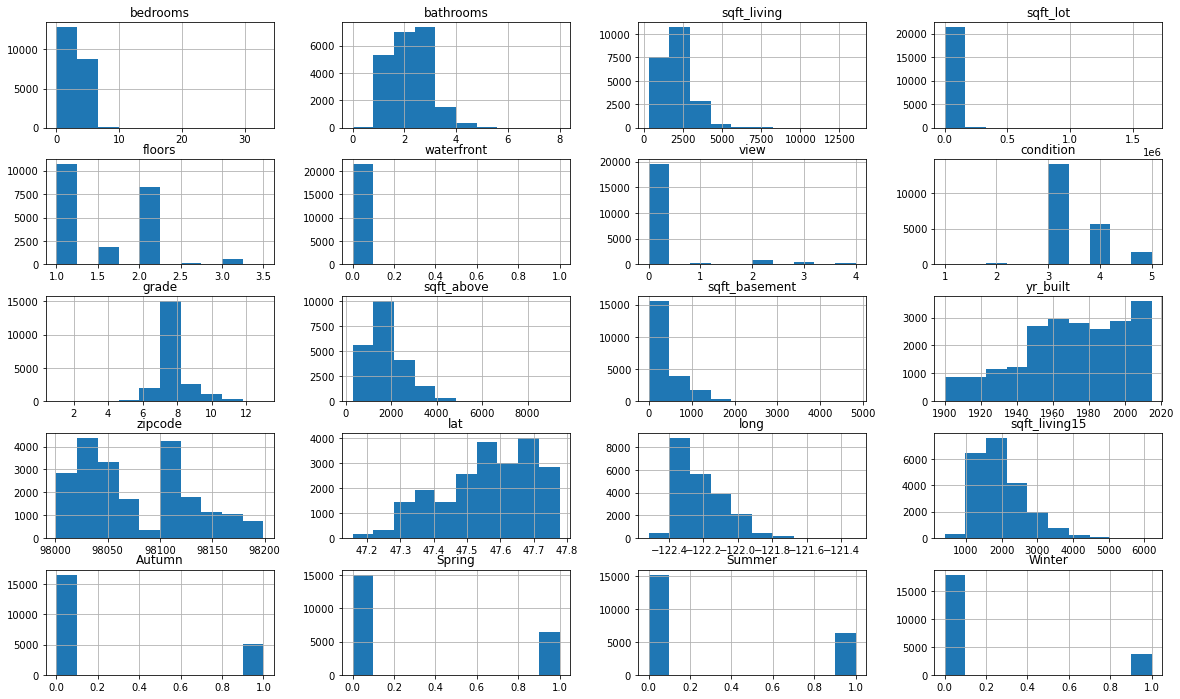

In [25]:
#visualizing the distribution of the variables
fig,ax = plt.subplots(figsize=(20,12))
pd.plotting.hist_frame(df1.drop(cats_to_drop,axis=1),ax= ax);

## transforming  `price` - model_3

In [26]:
cats_to_drop

['price', 'date', 'month_of_sale', 'season', 'yr_renovated', 'sqft_lot15']

In [27]:
#transforming price
df1['log_price'] = df1['price'].map(lambda x : np.log(x))

# modelling with the transformed price
outcome = 'log_price'
variables = df1.drop(['log_price','price', 'date', 'month_of_sale', 'season', 'yr_renovated', 'sqft_lot15'],axis=1)
variables_sum = '+'.join(variables.columns)

f = outcome + '~' + variables_sum
model_3 = ols(formula=f,data=df1).fit()

model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     4049.
Date:                Sat, 15 Oct 2022   Prob (F-statistic):               0.00
Time:                        09:31:31   Log-Likelihood:                -861.00
No. Observations:               21611   AIC:                             1760.
Df Residuals:                   21592   BIC:                             1912.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -2.5613      2.926     -0.875      0.381      -8.296       3.173
bedrooms         -0.0128      0.002     -5.421      0.000      -0.017      -0.008
bathrooms         0.0739      0.004     18.316      0.000       0.066       0.082
sqft_living    9.583e-05   2.84e-06     33.756      0.000    9.03e-05       0.000
sqft_lot       3.475e-07   4.35e-08      7.988      0.000    2.62e-07    4.33e-07
floors            0.0779      0.004     17.343      0.000       0.069       0.087
waterfront        0.3815      0.022     17.585      0.000       0.339       0.424
view              0.0609      0.003     22.735      0.000       0.056       0.066
condition         0.0596      0.003     20.517      0.000       0.054       0.065
grade             0.1596      0.003     59.279      0.000       0.154       0.165
sqft_above     4.028e-05   2.82e-06     14.288      0.000    3.48e-05    4.58e-05
sqft_basement  5.555e-05   3.31e-06     16.764      0.000    4.91e-05     6.2e-05
yr_built         -0.0036   8.62e-05    -42.252      0.000      -0.004      -0.003
zipcode          -0.0007   4.13e-05    -15.959      0.000      -0.001      -0.001
lat               1.3967      0.013    104.038      0.000       1.370       1.423
long             -0.1592      0.016     -9.720      0.000      -0.191      -0.127
sqft_living15  9.598e-05   4.31e-06     22.295      0.000    8.75e-05       0.000
Autumn           -0.6541      0.731     -0.894      0.371      -2.088       0.780
Spring           -0.6042      0.731     -0.826      0.409      -2.038       0.830
Summer           -0.6490      0.731     -0.887      0.375      -2.083       0.785
Winter           -0.6540      0.731     -0.894      0.371      -2.088       0.780
==============================================================================
Omnibus:                      402.850   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              839.330
Skew:                          -0.041   Prob(JB):                    5.52e-183
Kurtosis:                       3.962   Cond. No.                     1.58e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.6e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [28]:
print('R-squared value for the baseline_model = ',model_baseline.rsquared)
print('R-squared value for model_1 = ',model_1.rsquared)
print('R-squared value for model_2 = ',model_2.rsquared)
print('R-squared value for model_3 = ',model_3.rsquared)

R-squared value for the baseline_model =  0.700945186471388
R-squared value for model_1 =  0.7005392456518655
R-squared value for model_2 =  0.7001649223954842
R-squared value for model_3 =  0.7714301208904658


## transforming `sqft_living` - model_4

In [29]:
# Log transforming sqft_living
import numpy as np
df1['log_sqft_living'] = df1['sqft_living'].map(lambda x: np.log(x))

In [30]:
# modelling with the transformed sqft_living
outcome = 'log_price'
variables = df1.drop(['log_price','sqft_living','price', 'date', 'month_of_sale', 'season', 'yr_renovated', 'sqft_lot15'],axis=1)
variables_sum = '+'.join(variables.columns)

f = outcome + '~' + variables_sum
model_4 = ols(formula=f,data=df1).fit()

model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     3894.
Date:                Sat, 15 Oct 2022   Prob (F-statistic):               0.00
Time:                        09:31:31   Log-Likelihood:                -734.37
No. Observations:               21611   AIC:                             1509.
Df Residuals:                   21591   BIC:                             1668.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -5.9734      2.917     -2.048      0.041     -11.690      -0.257
bedrooms           -0.0235      0.002     -9.628      0.000      -0.028      -0.019
bathrooms           0.0689      0.004     17.104      0.000       0.061       0.077
sqft_lot         3.632e-07   4.33e-08      8.395      0.000    2.78e-07    4.48e-07
floors              0.0718      0.004     16.024      0.000       0.063       0.081
waterfront          0.3876      0.022     17.964      0.000       0.345       0.430
view                0.0631      0.003     23.681      0.000       0.058       0.068
condition           0.0565      0.003     19.528      0.000       0.051       0.062
grade               0.1568      0.003     58.443      0.000       0.152       0.162
sqft_above       5.289e-05   6.93e-06      7.635      0.000    3.93e-05    6.65e-05
sqft_basement    5.708e-05   8.04e-06      7.096      0.000    4.13e-05    7.28e-05
yr_built           -0.0037   8.59e-05    -43.461      0.000      -0.004      -0.004
zipcode            -0.0006    4.1e-05    -15.746      0.000      -0.001      -0.001
lat                 1.4011      0.013    104.956      0.000       1.375       1.427
long               -0.1717      0.016    -10.533      0.000      -0.204      -0.140
sqft_living15    9.023e-05    4.3e-06     21.007      0.000    8.18e-05    9.86e-05
Autumn             -1.5070      0.729     -2.067      0.039      -2.936      -0.078
Spring             -1.4571      0.729     -1.998      0.046      -2.886      -0.028
Summer             -1.5024      0.729     -2.060      0.039      -2.932      -0.073
Winter             -1.5069      0.729     -2.067      0.039      -2.936      -0.078
log_sqft_living     0.2332      0.015     15.953      0.000       0.205       0.262
==============================================================================
Omnibus:                      320.613   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              616.197
Skew:                           0.021   Prob(JB):                    1.57e-134
Kurtosis:                       3.826   Cond. No.                     1.31e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.25e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [31]:
print('R-squared value for the baseline model = ',model_baseline.rsquared)
print('R-squared value for model_1 = ',model_1.rsquared)
print('R-squared value for model_2 = ',model_2.rsquared)
print('R-squared value for model_3 = ',model_3.rsquared)
print('R-squared value for model_4 = ',model_4.rsquared)

R-squared value for the baseline model =  0.700945186471388
R-squared value for model_1 =  0.7005392456518655
R-squared value for model_2 =  0.7001649223954842
R-squared value for model_3 =  0.7714301208904658
R-squared value for model_4 =  0.7740930252816792


## transforming `sqft_above` - model_5

In [32]:
'price', 'date', 'month_of_sale', 'season', 'yr_renovated', 'sqft_lot15'

('price', 'date', 'month_of_sale', 'season', 'yr_renovated', 'sqft_lot15')

In [33]:
# tranforming sqft_above
df1['log_sqft_above'] = df1['sqft_above'].map(lambda x : np.log(x) )

In [34]:
# modelling with the transformed sqft_above
outcome = 'log_price'
variables = df1.drop(['log_price','price','date','month_of_sale','season','yr_renovated','sqft_lot15','sqft_living','sqft_above'],axis=1)
variables_sum = '+'.join(variables.columns)

f = outcome + '~' + variables_sum
model_5 = ols(formula=f,data=df1).fit()

model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     3882.
Date:                Sat, 15 Oct 2022   Prob (F-statistic):               0.00
Time:                        09:31:31   Log-Likelihood:                -759.48
No. Observations:               21611   AIC:                             1559.
Df Residuals:                   21591   BIC:                             1719.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -7.3202      2.937     -2.493      0.013     -13.076      -1.564
bedrooms           -0.0241      0.002     -9.821      0.000      -0.029      -0.019
bathrooms           0.0727      0.004     18.188      0.000       0.065       0.080
sqft_lot         3.941e-07   4.31e-08      9.147      0.000     3.1e-07    4.79e-07
floors              0.0713      0.005     15.736      0.000       0.062       0.080
waterfront          0.3937      0.022     18.243      0.000       0.351       0.436
view                0.0629      0.003     23.406      0.000       0.058       0.068
condition           0.0553      0.003     19.133      0.000       0.050       0.061
grade               0.1601      0.003     60.409      0.000       0.155       0.165
sqft_basement    3.951e-05   1.13e-05      3.506      0.000    1.74e-05    6.16e-05
yr_built           -0.0038   8.54e-05    -44.617      0.000      -0.004      -0.004
zipcode            -0.0006   4.11e-05    -15.304      0.000      -0.001      -0.001
lat                 1.3995      0.013    104.641      0.000       1.373       1.426
long               -0.1692      0.016    -10.359      0.000      -0.201      -0.137
sqft_living15    9.595e-05   4.22e-06     22.716      0.000    8.77e-05       0.000
Autumn             -1.8436      0.734     -2.511      0.012      -3.283      -0.405
Spring             -1.7939      0.734     -2.443      0.015      -3.233      -0.355
Summer             -1.8393      0.734     -2.505      0.012      -3.278      -0.400
Winter             -1.8434      0.734     -2.511      0.012      -3.282      -0.404
log_sqft_living     0.2580      0.023     11.213      0.000       0.213       0.303
log_sqft_above      0.0603      0.021      2.834      0.005       0.019       0.102
==============================================================================
Omnibus:                      327.549   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              625.791
Skew:                           0.044   Prob(JB):                    1.29e-136
Kurtosis:                       3.829   Cond. No.                     1.24e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.39e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [35]:
print('R-squared value for the baseline model = ',model_baseline.rsquared)
print('R-squared value for model_1 = ',model_1.rsquared)
print('R-squared value for model_2 = ',model_2.rsquared)
print('R-squared value for model_3 = ',model_3.rsquared)
print('R-squared value for model_4 = ',model_4.rsquared)
print('R-squared value for model_5 = ',model_5.rsquared)

R-squared value for the baseline model =  0.700945186471388
R-squared value for model_1 =  0.7005392456518655
R-squared value for model_2 =  0.7001649223954842
R-squared value for model_3 =  0.7714301208904658
R-squared value for model_4 =  0.7740930252816792
R-squared value for model_5 =  0.7735674107721398


## transforming `yr_built` - model_6

In [36]:
# transfomring yr_built
df1['log_yr_built'] = df1['yr_built'].map(lambda x : np.log(x))

In [37]:
# modelling with the transformed yr_built
outcome = 'log_price'
variables = df1.drop(['price','log_price','date','month_of_sale','season','yr_renovated','sqft_lot15','sqft_living','sqft_above','yr_built'],axis=1)
variables_sum = '+'.join(variables.columns)

f = outcome + '~' + variables_sum
model_6 = ols(formula=f,data=df1).fit()

model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     3887.
Date:                Sat, 15 Oct 2022   Prob (F-statistic):               0.00
Time:                        09:31:31   Log-Likelihood:                -749.48
No. Observations:               21611   AIC:                             1539.
Df Residuals:                   21591   BIC:                             1699.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          32.3833      3.351      9.663      0.000      25.814      38.952
bedrooms           -0.0240      0.002     -9.800      0.000      -0.029      -0.019
bathrooms           0.0726      0.004     18.202      0.000       0.065       0.080
sqft_lot         3.946e-07   4.31e-08      9.162      0.000     3.1e-07    4.79e-07
floors              0.0706      0.005     15.599      0.000       0.062       0.079
waterfront          0.3938      0.022     18.258      0.000       0.352       0.436
view                0.0629      0.003     23.427      0.000       0.058       0.068
condition           0.0553      0.003     19.148      0.000       0.050       0.061
grade               0.1602      0.003     60.473      0.000       0.155       0.165
sqft_basement    3.944e-05   1.13e-05      3.502      0.000    1.74e-05    6.15e-05
zipcode            -0.0006   4.11e-05    -15.364      0.000      -0.001      -0.001
lat                 1.3993      0.013    104.687      0.000       1.373       1.426
long               -0.1687      0.016    -10.334      0.000      -0.201      -0.137
sqft_living15    9.588e-05   4.22e-06     22.711      0.000    8.76e-05       0.000
Autumn              8.0822      0.838      9.647      0.000       6.440       9.724
Spring              8.1320      0.838      9.706      0.000       6.490       9.774
Summer              8.0865      0.838      9.652      0.000       6.444       9.729
Winter              8.0825      0.838      9.647      0.000       6.440       9.725
log_sqft_living     0.2581      0.023     11.223      0.000       0.213       0.303
log_sqft_above      0.0602      0.021      2.832      0.005       0.019       0.102
log_yr_built       -7.4939      0.167    -44.861      0.000      -7.821      -7.166
==============================================================================
Omnibus:                      329.610   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              631.295
Skew:                           0.044   Prob(JB):                    8.24e-138
Kurtosis:                       3.833   Cond. No.                     1.23e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.41e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [38]:
print('R-squared value for the baseline model = ',model_baseline.rsquared)
print('R-squared value for model_1 = ',model_1.rsquared)
print('R-squared value for model_2 = ',model_2.rsquared)
print('R-squared value for model_3 = ',model_3.rsquared)
print('R-squared value for model_4 = ',model_4.rsquared)
print('R-squared value for model_5 = ',model_5.rsquared)
print('R-squared value for model_6 = ',model_6.rsquared)

R-squared value for the baseline model =  0.700945186471388
R-squared value for model_1 =  0.7005392456518655
R-squared value for model_2 =  0.7001649223954842
R-squared value for model_3 =  0.7714301208904658
R-squared value for model_4 =  0.7740930252816792
R-squared value for model_5 =  0.7735674107721398
R-squared value for model_6 =  0.7737769733988069


## transforming `zipcode` - model_7

In [39]:
#transforming zipcode
df1['log_zipcode'] = df1['zipcode'].map(lambda x : np.log(x))

In [40]:
# modelling with the transformed zip_code
outcome = 'log_price'
variables = df1.drop(['price','log_price','date','month_of_sale','season','yr_renovated','sqft_lot15','sqft_living','sqft_above','yr_built','zipcode'],axis=1)
variables_sum = '+'.join(variables.columns)

f = outcome + '~' + variables_sum
model_7 = ols(formula=f,data=df1).fit()

model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     3887.
Date:                Sat, 15 Oct 2022   Prob (F-statistic):               0.00
Time:                        09:31:31   Log-Likelihood:                -749.52
No. Observations:               21611   AIC:                             1539.
Df Residuals:                   21591   BIC:                             1699.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         552.5451     36.517     15.131      0.000     480.969     624.121
bedrooms           -0.0240      0.002     -9.800      0.000      -0.029      -0.019
bathrooms           0.0726      0.004     18.202      0.000       0.065       0.080
sqft_lot         3.946e-07   4.31e-08      9.162      0.000     3.1e-07    4.79e-07
floors              0.0706      0.005     15.600      0.000       0.062       0.079
waterfront          0.3939      0.022     18.258      0.000       0.352       0.436
view                0.0629      0.003     23.427      0.000       0.058       0.068
condition           0.0553      0.003     19.148      0.000       0.050       0.061
grade               0.1602      0.003     60.473      0.000       0.155       0.165
sqft_basement    3.943e-05   1.13e-05      3.502      0.000    1.74e-05    6.15e-05
lat                 1.3993      0.013    104.685      0.000       1.373       1.426
long               -0.1687      0.016    -10.332      0.000      -0.201      -0.137
sqft_living15    9.588e-05   4.22e-06     22.711      0.000    8.76e-05       0.000
Autumn            138.1227      9.129     15.130      0.000     120.229     156.017
Spring            138.1724      9.129     15.135      0.000     120.278     156.066
Summer            138.1270      9.129     15.130      0.000     120.233     156.021
Winter            138.1230      9.129     15.130      0.000     120.229     156.017
log_sqft_living     0.2581      0.023     11.223      0.000       0.213       0.303
log_sqft_above      0.0602      0.021      2.832      0.005       0.019       0.102
log_yr_built       -7.4939      0.167    -44.861      0.000      -7.821      -7.167
log_zipcode       -61.9624      4.034    -15.361      0.000     -69.869     -54.056
==============================================================================
Omnibus:                      329.607   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              631.291
Skew:                           0.044   Prob(JB):                    8.26e-138
Kurtosis:                       3.833   Cond. No.                     5.63e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.32e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [41]:
print('R-squared value for the baseline model = ',model_baseline.rsquared)
print('R-squared value for model_1 = ',model_1.rsquared)
print('R-squared value for model_2 = ',model_2.rsquared)
print('R-squared value for model_3 = ',model_3.rsquared)
print('R-squared value for model_4 = ',model_4.rsquared)
print('R-squared value for model_5 = ',model_5.rsquared)
print('R-squared value for model_6 = ',model_6.rsquared)
print('R-squared value for model_7 = ',model_7.rsquared)

R-squared value for the baseline model =  0.700945186471388
R-squared value for model_1 =  0.7005392456518655
R-squared value for model_2 =  0.7001649223954842
R-squared value for model_3 =  0.7714301208904658
R-squared value for model_4 =  0.7740930252816792
R-squared value for model_5 =  0.7735674107721398
R-squared value for model_6 =  0.7737769733988069
R-squared value for model_7 =  0.7737760147179411


## transforming `sqft_lot` - model_8

In [59]:
#transforming sqft_lot
df1['log_sqft_lot'] = df1['sqft_lot'].map(lambda x : np.log(x))

# modelling with the transformed price
outcome = 'log_price'
variables = df1.drop(['price','log_price','date','month_of_sale','season','yr_renovated','sqft_lot15','sqft_living','sqft_above','yr_built','zipcode','sqft_lot'],axis=1)
variables_sum = '+'.join(variables.columns)

f = outcome + '~' + variables_sum
model_8 = ols(formula=f,data=df1).fit()

model_8.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     3879.
Date:                Sat, 15 Oct 2022   Prob (F-statistic):               0.00
Time:                        10:32:20   Log-Likelihood:                -765.99
No. Observations:               21611   AIC:                             1572.
Df Residuals:                   21591   BIC:                             1732.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         561.1249     36.573     15.343      0.000     489.440     632.810
bedrooms           -0.0262      0.002    -10.723      0.000      -0.031      -0.021
bathrooms           0.0706      0.004     17.624      0.000       0.063       0.078
floors              0.0544      0.005     11.069      0.000       0.045       0.064
waterfront          0.3997      0.022     18.491      0.000       0.357       0.442
view                0.0647      0.003     24.098      0.000       0.059       0.070
condition           0.0551      0.003     19.052      0.000       0.049       0.061
grade               0.1604      0.003     60.511      0.000       0.155       0.166
sqft_basement    4.312e-05   1.13e-05      3.825      0.000     2.1e-05    6.52e-05
lat                 1.3792      0.013    102.610      0.000       1.353       1.406
long               -0.1119      0.017     -6.727      0.000      -0.145      -0.079
sqft_living15    9.816e-05   4.25e-06     23.114      0.000    8.98e-05       0.000
Autumn            140.2677      9.143     15.341      0.000     122.346     158.189
Spring            140.3174      9.143     15.347      0.000     122.396     158.239
Summer            140.2714      9.143     15.342      0.000     122.350     158.193
Winter            140.2683      9.143     15.341      0.000     122.347     158.190
log_sqft_living     0.2579      0.023     11.206      0.000       0.213       0.303
log_sqft_above      0.0879      0.021      4.095      0.000       0.046       0.130
log_yr_built       -7.7068      0.168    -45.933      0.000      -8.036      -7.378
log_zipcode       -62.0689      4.038    -15.373      0.000     -69.983     -54.155
log_sqft_lot       -0.0179      0.003     -7.136      0.000      -0.023      -0.013
==============================================================================
Omnibus:                      384.868   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              739.973
Skew:                           0.093   Prob(JB):                    2.07e-161
Kurtosis:                       3.887   Cond. No.                     2.73e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.31e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [43]:
print('R-squared value for the baseline model = ',model_baseline.rsquared)
print('R-squared value for model_1 = ',model_1.rsquared)
print('R-squared value for model_2 = ',model_2.rsquared)
print('R-squared value for model_3 = ',model_3.rsquared)
print('R-squared value for model_4 = ',model_4.rsquared)
print('R-squared value for model_5 = ',model_5.rsquared)
print('R-squared value for model_6 = ',model_6.rsquared)
print('R-squared value for model_7 = ',model_7.rsquared)
print('R-squared value for model_8 = ',model_8.rsquared)

R-squared value for the baseline model =  0.700945186471388
R-squared value for model_1 =  0.7005392456518655
R-squared value for model_2 =  0.7001649223954842
R-squared value for model_3 =  0.7714301208904658
R-squared value for model_4 =  0.7740930252816792
R-squared value for model_5 =  0.7735674107721398
R-squared value for model_6 =  0.7737769733988069
R-squared value for model_7 =  0.7737760147179411
R-squared value for model_8 =  0.773430966184156


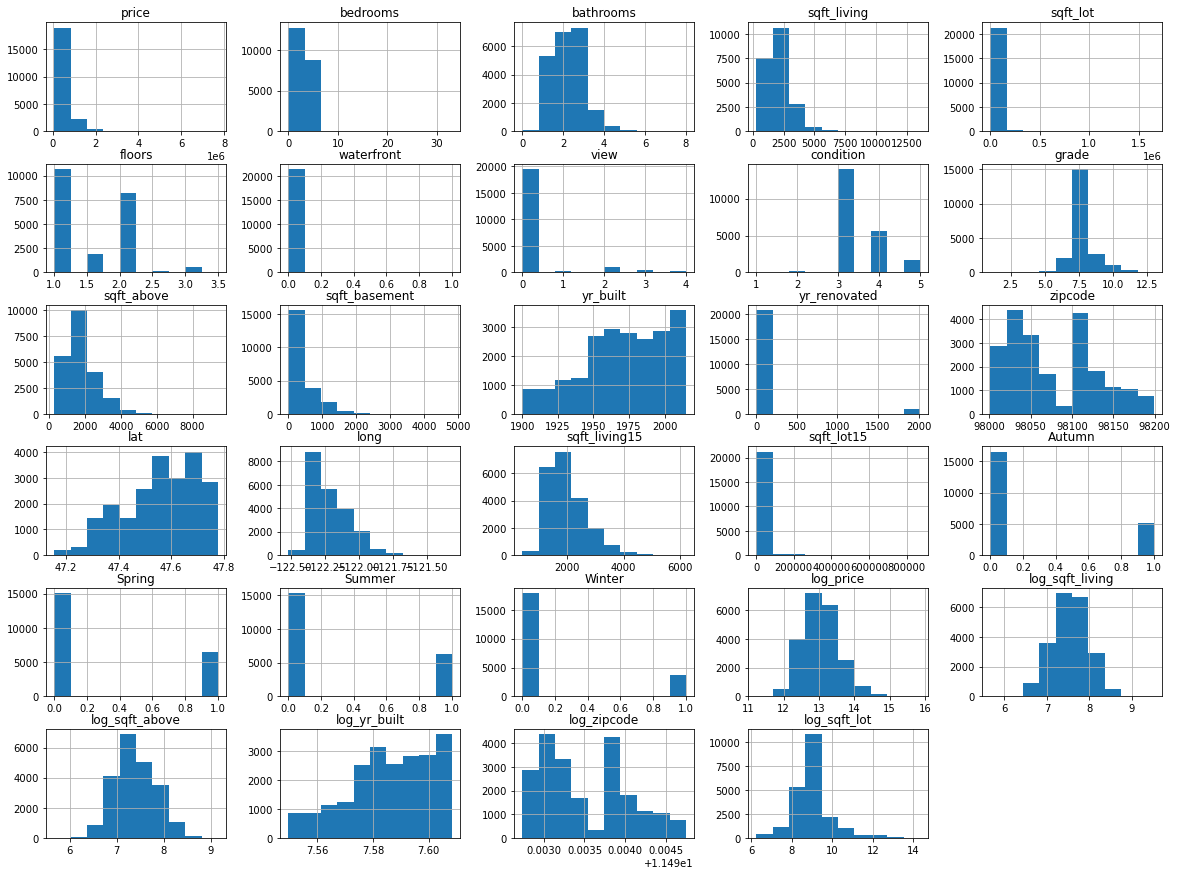

In [44]:
#visualizing the distribution
fig,ax = plt.subplots(figsize=(20,15))
pd.plotting.hist_frame(df1,ax=ax);

In [45]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             21613 non-null  datetime64[ns]
 1   price            21613 non-null  float64       
 2   bedrooms         21613 non-null  int64         
 3   bathrooms        21613 non-null  float64       
 4   sqft_living      21613 non-null  int64         
 5   sqft_lot         21613 non-null  int64         
 6   floors           21613 non-null  float64       
 7   waterfront       21613 non-null  int64         
 8   view             21613 non-null  int64         
 9   condition        21613 non-null  int64         
 10  grade            21613 non-null  int64         
 11  sqft_above       21611 non-null  float64       
 12  sqft_basement    21613 non-null  int64         
 13  yr_built         21613 non-null  int64         
 14  yr_renovated     21613 non-null  int64

### Since some of our predictor variables are of different scales, let's try scaling to see if it will help the model

In [46]:
# creating a copy of df1 with only the transformed variables
df2=df1.copy()
df2.drop(['date','price','sqft_living','sqft_above','yr_built','zipcode','sqft_lot','month_of_sale','season'],axis=1,inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bedrooms         21613 non-null  int64  
 1   bathrooms        21613 non-null  float64
 2   floors           21613 non-null  float64
 3   waterfront       21613 non-null  int64  
 4   view             21613 non-null  int64  
 5   condition        21613 non-null  int64  
 6   grade            21613 non-null  int64  
 7   sqft_basement    21613 non-null  int64  
 8   yr_renovated     21613 non-null  int64  
 9   lat              21613 non-null  float64
 10  long             21613 non-null  float64
 11  sqft_living15    21613 non-null  int64  
 12  sqft_lot15       21613 non-null  int64  
 13  Autumn           21613 non-null  float64
 14  Spring           21613 non-null  float64
 15  Summer           21613 non-null  float64
 16  Winter           21613 non-null  float64
 17  log_price   

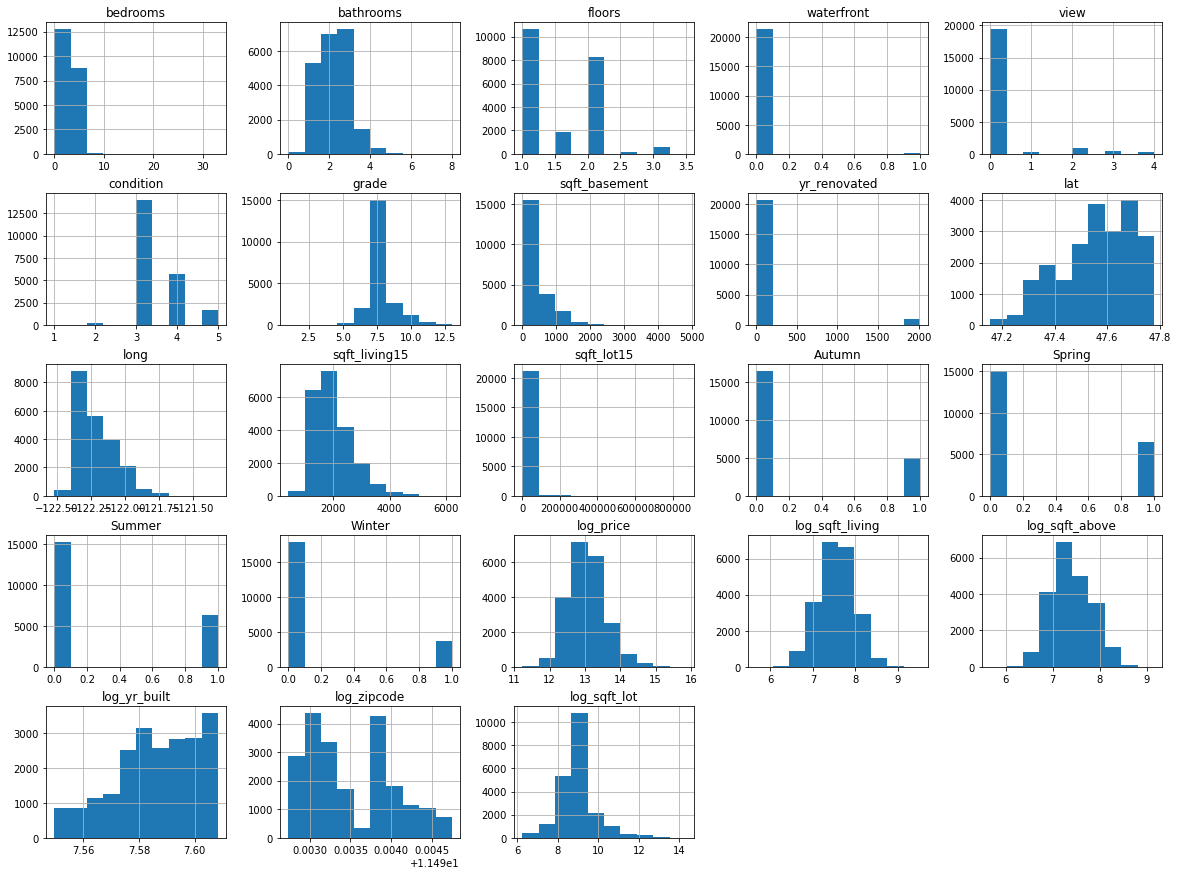

In [47]:
#visualizing the distribution
fig,ax = plt.subplots(figsize=(20,15))
pd.plotting.hist_frame(df2,ax=ax);

In [64]:
model_8.params

Intercept          561.124884
bedrooms            -0.026218
bathrooms            0.070582
floors               0.054351
waterfront           0.399658
view                 0.064701
condition            0.055075
grade                0.160362
sqft_basement        0.000043
lat                  1.379171
long                -0.111942
sqft_living15        0.000098
Autumn             140.267741
Spring             140.317397
Summer             140.271444
Winter             140.268301
log_sqft_living      0.257930
log_sqft_above       0.087888
log_yr_built        -7.706812
log_zipcode        -62.068867
log_sqft_lot        -0.017930
dtype: float64

### scaling `sqft_lot15` & `sqft_living15`

In [48]:
#getting summary stats of the sqft_lot15
df2['sqft_lot15'].describe()

count     21613.000000
mean      12768.455652
std       27304.179631
min         651.000000
25%        5100.000000
50%        7620.000000
75%       10083.000000
max      871200.000000
Name: sqft_lot15, dtype: float64

In [49]:
df2['sqft_living15'].describe()

count    21613.000000
mean      1986.552492
std        685.391304
min        399.000000
25%       1490.000000
50%       1840.000000
75%       2360.000000
max       6210.000000
Name: sqft_living15, dtype: float64

In [50]:
#scaling
#importing preprocessing module 
from sklearn import preprocessing

#fit it onto the dat
min_max_scale = preprocessing.MinMaxScaler().fit(df2[['sqft_lot15','sqft_living15']])

#transform the data
min_max_values = min_max_scale.transform(df2[['sqft_lot15','sqft_living15']])

#transformed values
min_max_values

array([[0.00574235, 0.16193426],
       [0.00802712, 0.22216486],
       [0.00851302, 0.3994149 ],
       ...,
       [0.00155764, 0.10686629],
       [0.00073057, 0.17398038],
       [0.00081098, 0.10686629]])

In [51]:
# converting to a df
df_minmax = pd.DataFrame(min_max_values)
df_minmax.rename(columns = {0:'scaled_sqft_lot15',1:'scaled_sqft_living15'},inplace=True)

In [52]:
df_minmax.head()

,scaled_sqft_lot15,scaled_sqft_living15
0,0.005742,0.161934
1,0.008027,0.222165
2,0.008513,0.399415
3,0.004996,0.165376
4,0.007871,0.241094


In [53]:
# appending to df2
df2 = pd.concat([df2,df_minmax],axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bedrooms              21613 non-null  int64  
 1   bathrooms             21613 non-null  float64
 2   floors                21613 non-null  float64
 3   waterfront            21613 non-null  int64  
 4   view                  21613 non-null  int64  
 5   condition             21613 non-null  int64  
 6   grade                 21613 non-null  int64  
 7   sqft_basement         21613 non-null  int64  
 8   yr_renovated          21613 non-null  int64  
 9   lat                   21613 non-null  float64
 10  long                  21613 non-null  float64
 11  sqft_living15         21613 non-null  int64  
 12  sqft_lot15            21613 non-null  int64  
 13  Autumn                21613 non-null  float64
 14  Spring                21613 non-null  float64
 15  Summer             

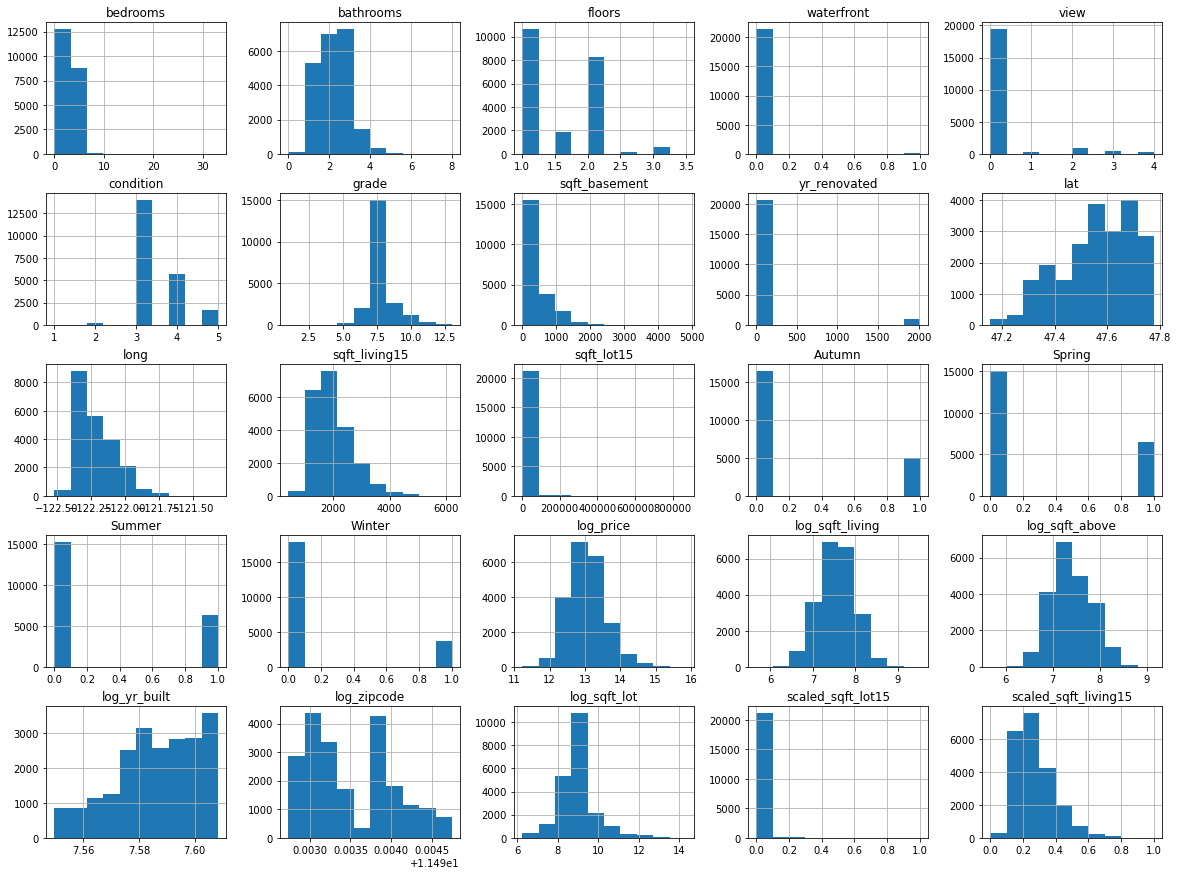

In [54]:
#visualizing the distribution
fig,ax = plt.subplots(figsize=(20,15))
pd.plotting.hist_frame(df2,ax=ax);

In [66]:
# modelling with the scaled_sqft_lot15
outcome = 'log_price'
variables = df2.drop(['log_price','sqft_lot15','sqft_living15'],axis=1)
variables_sum = '+'.join(variables.columns)

f = outcome + '~' + variables_sum
model_9 = ols(formula=f,data=df2).fit()

model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     3547.
Date:                Sat, 15 Oct 2022   Prob (F-statistic):               0.00
Time:                        10:38:52   Log-Likelihood:                -677.40
No. Observations:               21611   AIC:                             1399.
Df Residuals:                   21589   BIC:                             1574.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              568.8737     36.482     15.593      0.000     497.366     640.382
bedrooms                -0.0233      0.002     -9.509      0.000      -0.028      -0.018
bathrooms                0.0653      0.004     16.237      0.000       0.057       0.073
floors                   0.0403      0.005      8.029      0.000       0.030       0.050
waterfront               0.4000      0.022     18.545      0.000       0.358       0.442
view                     0.0635      0.003     23.734      0.000       0.058       0.069
condition                0.0586      0.003     20.053      0.000       0.053       0.064
grade                    0.1595      0.003     60.417      0.000       0.154       0.165
sqft_basement         4.233e-05   1.12e-05      3.770      0.000    2.03e-05    6.43e-05
yr_renovated          3.147e-05   4.54e-06      6.934      0.000    2.26e-05    4.04e-05
lat                      1.3809      0.013    103.084      0.000       1.355       1.407
long                    -0.1199      0.017     -7.232      0.000      -0.152      -0.087
Autumn                 142.2048      9.121     15.592      0.000     124.328     160.082
Spring                 142.2540      9.121     15.597      0.000     124.377     160.131
Summer                 142.2087      9.121     15.592      0.000     124.332     160.086
Winter                 142.2063      9.121     15.592      0.000     124.329     160.083
log_sqft_living          0.2554      0.023     11.139      0.000       0.210       0.300
log_sqft_above           0.1002      0.021      4.683      0.000       0.058       0.142
log_yr_built            -7.3929      0.176    -41.961      0.000      -7.738      -7.048
log_zipcode            -63.1965      4.026    -15.697      0.000     -71.088     -55.305
log_sqft_lot            -0.0405      0.003    -12.722      0.000      -0.047      -0.034
scaled_sqft_lot15        0.8290      0.073     11.399      0.000       0.686       0.971
scaled_sqft_living15     0.5955      0.025     24.146      0.000       0.547       0.644
==============================================================================
Omnibus:                      401.282   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              800.665
Skew:                           0.081   Prob(JB):                    1.37e-174
Kurtosis:                       3.929   Cond. No.                     5.52e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.11e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [74]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bedrooms              21613 non-null  int64  
 1   bathrooms             21613 non-null  float64
 2   floors                21613 non-null  float64
 3   waterfront            21613 non-null  int64  
 4   view                  21613 non-null  int64  
 5   condition             21613 non-null  int64  
 6   grade                 21613 non-null  int64  
 7   sqft_basement         21613 non-null  int64  
 8   yr_renovated          21613 non-null  int64  
 9   lat                   21613 non-null  float64
 10  long                  21613 non-null  float64
 11  sqft_living15         21613 non-null  int64  
 12  sqft_lot15            21613 non-null  int64  
 13  Autumn                21613 non-null  float64
 14  Spring                21613 non-null  float64
 15  Summer             

In [79]:
# create predictors
predictors = df2.drop(['log_price', 'log_sqft_above'], axis=1)

# create model intercept
predictors_int = sm.add_constant(predictors)

# fit model to data
model = sm.OLS(df2['log_price'],predictors_int).fit()

In [80]:
model.params

const                   575.981509
bedrooms                 -0.022859
bathrooms                 0.066727
floors                    0.044750
waterfront                0.400866
view                      0.064926
condition                 0.058194
grade                     0.161163
sqft_basement            -0.000004
yr_renovated              0.000032
lat                       1.378606
long                     -0.117520
sqft_living15             0.006909
sqft_lot15                0.000001
Autumn                  143.981864
Spring                  144.030839
Summer                  143.985692
Winter                  143.983114
log_sqft_living           0.351986
log_yr_built             -7.456003
log_zipcode             -64.134171
log_sqft_lot             -0.038422
scaled_sqft_lot15        -0.430721
scaled_sqft_living15    -39.548548
dtype: float64

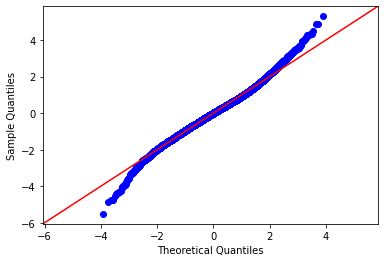

In [67]:
import scipy.stats as stats
residuals = model_9.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()